<a href="https://colab.research.google.com/github/Yug25/DELHI-peek-power-DEmand-prediction/blob/main/power_demand_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delhi Power Demand Prediction: Analysis Report
`
`
`
`

## 1. Data Overview

The dataset contains daily historical records of peak electricity demand (in megawatts, MW) in Delhi alongside detailed weather data. Key variables include:

- **DATE:** The specific date of the recorded observation.
- **POWER_DEMAND:** Peak electricity demand (in MW) for that day in Delhi.
- **Weather Variables:** tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, humidity, precip, precipprob, precipcover, preciptype, windspeed, sealevelpressure, conditions.

## 2. Data Cleaning and Preprocessing
`

- The 'preciptype' column initially contained missing values. These were addressed by imputing "None" where 'precip' and 'precipprob' were 0, indicating no precipitation.
`

- Outliers in numerical features (excluding 'POWER_DEMAND') were handled using the Interquartile Range (IQR) method. Extreme values were capped at 1.5 times the IQR.
`

- The 'DATE' column was converted to a datetime object.
- Temporal features (dayofweek, month, year) were extracted from the 'DATE' column.
`

- Boolean features 'is_weekly_holiday' (Sunday = 1) and 'is_public_holiday' (Indian public holidays for Delhi = 1) were added.

## 3. Feature Engineering
`

- Lagged features for 'POWER_DEMAND' were created with lags of 1, 7, and 14 days (POWER_DEMAND_lag1, POWER_DEMAND_lag7, POWER_DEMAND_lag14) to capture past demand patterns.
`

- 3-day and 7-day moving averages of 'POWER_DEMAND' were created (POWER_DEMAND_ma3, POWER_DEMAND_ma7) to smooth out short-term fluctuations and highlight trends.
`

- Interaction terms between selected weather features were created to capture potential combined effects:
    - temp_humidity_interaction
    - feelslike_windspeed_interaction
    - tempmax_precip_interaction
    - tempmin_humidity_interaction

## 6. Exploratory Data Analysis and Visualization
`

- A correlation matrix and heatmap were generated to analyze relationships between variables.
`

- **Strong Positive Correlations:** 'POWER_DEMAND' exhibited strong positive correlations with temperature variables (tempmax, temp, feelslikemax, feelslike), indicating that higher temperatures are associated with increased power demand.
- **Moderate Positive Correlations:** 'POWER_DEMAND' showed moderate positive correlations with 'POWER_DEMAND_lag1', 'POWER_DEMAND_lag7', 'POWER_DEMAND_lag14', 'POWER_DEMAND_ma3', 'POWER_DEMAND_ma7', 'tempmin_humidity_interaction', 'temp_humidity_interaction', and 'feelslike_windspeed_interaction'.
- **Weak or No Correlations:** 'POWER_DEMAND' showed weak or no linear correlations with humidity, precipitation (precip), precipitation probability (precipprob), precipitation coverage (precipcover), wind speed (windspeed), sea level pressure (sealevelpressure), and 'tempmax_precip_interaction'.
`

- Scatter plots were generated to visualize the relationship between 'POWER_DEMAND' and temperature variables, revealing a potential non-linear relationship, especially at higher temperatures.
- Scatter plots were generated to visualize the relationship between 'POWER_DEMAND' and other weather variables (humidity, precipitation, wind speed, sea level pressure).
- A time series plot of 'POWER_DEMAND' with moving averages was generated, showing potential seasonality and the smoothing effect of moving averages.
- Box plots were created to compare power demand distributions between weekdays/weekends and holidays/non-holidays, demonstrating lower and less variable demand during weekends and holidays.
`

- Analysis showed significantly lower power demand on weekends and holidays compared to weekdays and non-holidays, highlighting the importance of these features for the prediction model.
`

- Autocorrelation plots (ACF and PACF) confirmed strong autocorrelation in 'POWER_DEMAND', especially at lags 1, 7, and 14, indicating daily, weekly, and bi-weekly patterns.
- Scatter plots and correlation coefficients revealed strong positive linear relationships between 'POWER_DEMAND' and lagged features.
`

- Scatter plots and correlation coefficients indicated strong positive linear relationships between 'POWER_DEMAND' and moving average features, particularly the 3-day moving average.
`

- Correlation analysis showed that 'feelslike_windspeed_interaction' had the strongest positive correlation with 'POWER_DEMAND', suggesting a potential combined effect.
- 'tempmin_humidity_interaction' and 'temp_humidity_interaction' also exhibited moderate positive correlations.


## 6. Findings and Recommendations
`

- Temperature variables (tempmax, temp, feelslikemax, feelslike) are strong predictors of power demand.
- Lagged features (POWER_DEMAND_lag1, POWER_DEMAND_lag7, POWER_DEMAND_lag14) and moving average features (POWER_DEMAND_ma3, POWER_DEMAND_ma7) are valuable for capturing past demand patterns and trends.
- Holidays and weekends have a significant impact on power demand and should be included in the model.
- Interaction terms, particularly 'feelslike_windspeed_interaction', 'tempmin_humidity_interaction', and 'temp_humidity_interaction', show potential for improving model accuracy.
`

- **Feature Selection:** Prioritize temperature variables, lagged features, moving average features, and holiday indicators. Consider including interaction terms, especially 'feelslike_windspeed_interaction'. Evaluate feature importance using appropriate techniques (e.g., feature importance from tree-based models).
- **Model Building:** Experiment with various regression models (e.g., linear regression, random forest, XGBoost) to find the best-performing model for power demand prediction. Consider time series models (e.g., ARIMA) given the observed autocorrelation.
- **Model Evaluation:** Use appropriate metrics (e.g., RMSE, MAE, R-squared) to evaluate model performance on a held-out test set.
- **Hyperparameter Tuning:** Optimize model hyperparameters to achieve the best possible performance.
- **Non-linearity and Interactions:** Further investigate potential non-linear relationships between predictors and power demand. Consider transformations (e.g., polynomial features) or interaction terms.
- **Seasonality:** Explore seasonality in more detail and consider incorporating seasonal components into the model.

## 7. Conclusion

This analysis provides a comprehensive understanding of the Delhi power demand dataset and identifies potential predictors for an effective prediction model. By following the recommendations and further exploring the identified patterns and relationships, the i can develop a robust and accurate model for forecasting power demand in Delhi.

In [ ]:
import pandas as pd
import numpy as np
df1=pd.read_csv('/content/df_final (1).csv')
df1.head()

,DATE,POWER_DEMAND,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2022-05-01,5993,"Delhi,India",2022-05-01,40.0,28.2,33.9,42.3,28.3,34.0,...,26.7,10,10,2022-05-01T05:40:38,2022-05-01T18:56:20,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."
1,2022-05-02,6123,"Delhi,India",2022-05-02,40.0,28.4,34.1,42.0,30.3,35.5,...,26.4,10,10,2022-05-02T05:39:48,2022-05-02T18:56:57,0.05,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."
2,2022-05-03,6127,"Delhi,India",2022-05-03,37.7,29.0,33.2,42.1,31.3,36.2,...,26.4,9,10,2022-05-03T05:38:59,2022-05-03T18:57:33,0.08,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."
3,2022-05-04,6121,"Delhi,India",2022-05-04,37.2,24.0,31.1,43.1,24.0,33.5,...,25.0,9,30,2022-05-04T05:38:11,2022-05-04T18:58:09,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"42182099999,42176099999,VIDP,42139099999,42181..."
4,2022-05-05,5371,"Delhi,India",2022-05-05,37.0,23.5,30.0,37.6,23.5,30.5,...,26.4,10,10,2022-05-05T05:37:24,2022-05-05T18:58:46,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."


In [ ]:
# List of columns to delete
columns_to_delete = ['name', 'datetime', 'dew', 'snow', 'snowdepth', 'windgust', 'winddir', 'cloudcover',
                     'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
                     'moonphase', 'sunset', 'description', 'icon', 'stations']

# Dropping the columns from df_final
df1 = df1.drop(columns=columns_to_delete)

# Display the modified DataFrame
df1


,DATE,POWER_DEMAND,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,preciptype,windspeed,sealevelpressure,conditions
0,2022-05-01,5993,40.0,28.2,33.9,42.3,28.3,34.0,32.4,0.00,0,0.00,NaN,22.3,1000.3,Partially cloudy
1,2022-05-02,6123,40.0,28.4,34.1,42.0,30.3,35.5,41.7,0.00,0,0.00,NaN,22.3,1000.4,Partially cloudy
2,2022-05-03,6127,37.7,29.0,33.2,42.1,31.3,36.2,49.2,0.00,0,0.00,NaN,20.5,1003.2,Partially cloudy
3,2022-05-04,6121,37.2,24.0,31.1,43.1,24.0,33.5,54.8,0.97,100,4.17,rain,27.7,1005.6,"Rain, Partially cloudy"
4,2022-05-05,5371,37.0,23.5,30.0,37.6,23.5,30.5,53.2,0.00,0,0.00,NaN,9.8,1006.2,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2024-09-14,4683,31.0,23.0,26.5,37.6,23.0,29.1,87.5,1.00,100,8.33,rain,16.6,1003.5,"Rain, Partially cloudy"
866,2024-09-15,4630,32.0,25.0,28.0,36.7,25.0,31.2,81.8,0.20,100,4.17,rain,20.5,1004.3,"Rain, Partially cloudy"
867,2024-09-16,5000,32.0,26.0,28.8,37.8,26.0,32.2,77.8,0.00,0,0.00,NaN,20.5,1005.8,Partially cloudy
868,2024-09-17,5490,33.0,26.0,29.0,38.0,26.0,33.0,78.1,0.00,0,0.00,NaN,13.0,1007.3,Partially cloudy


In [ ]:
df1.info()
df1.describe()

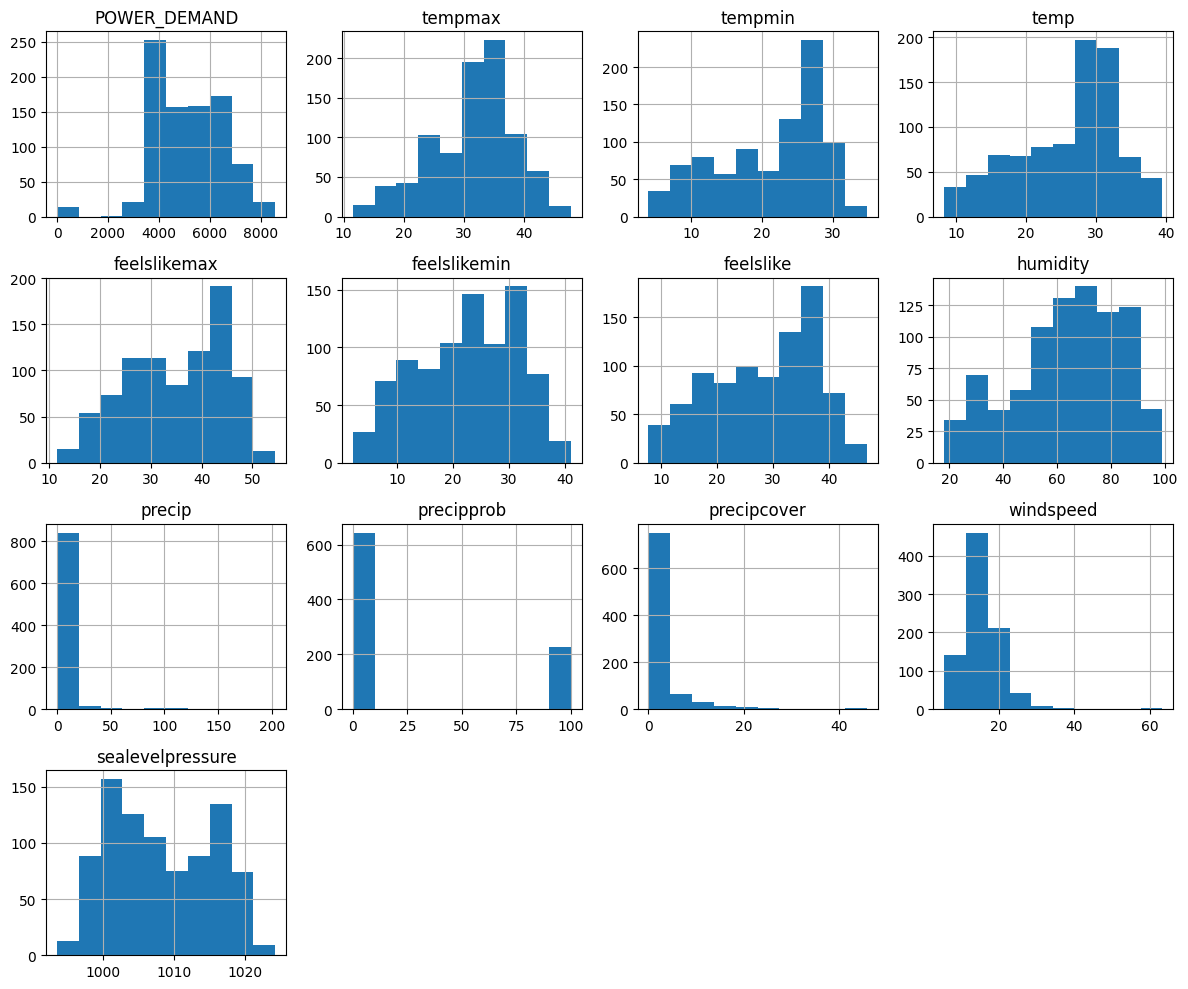

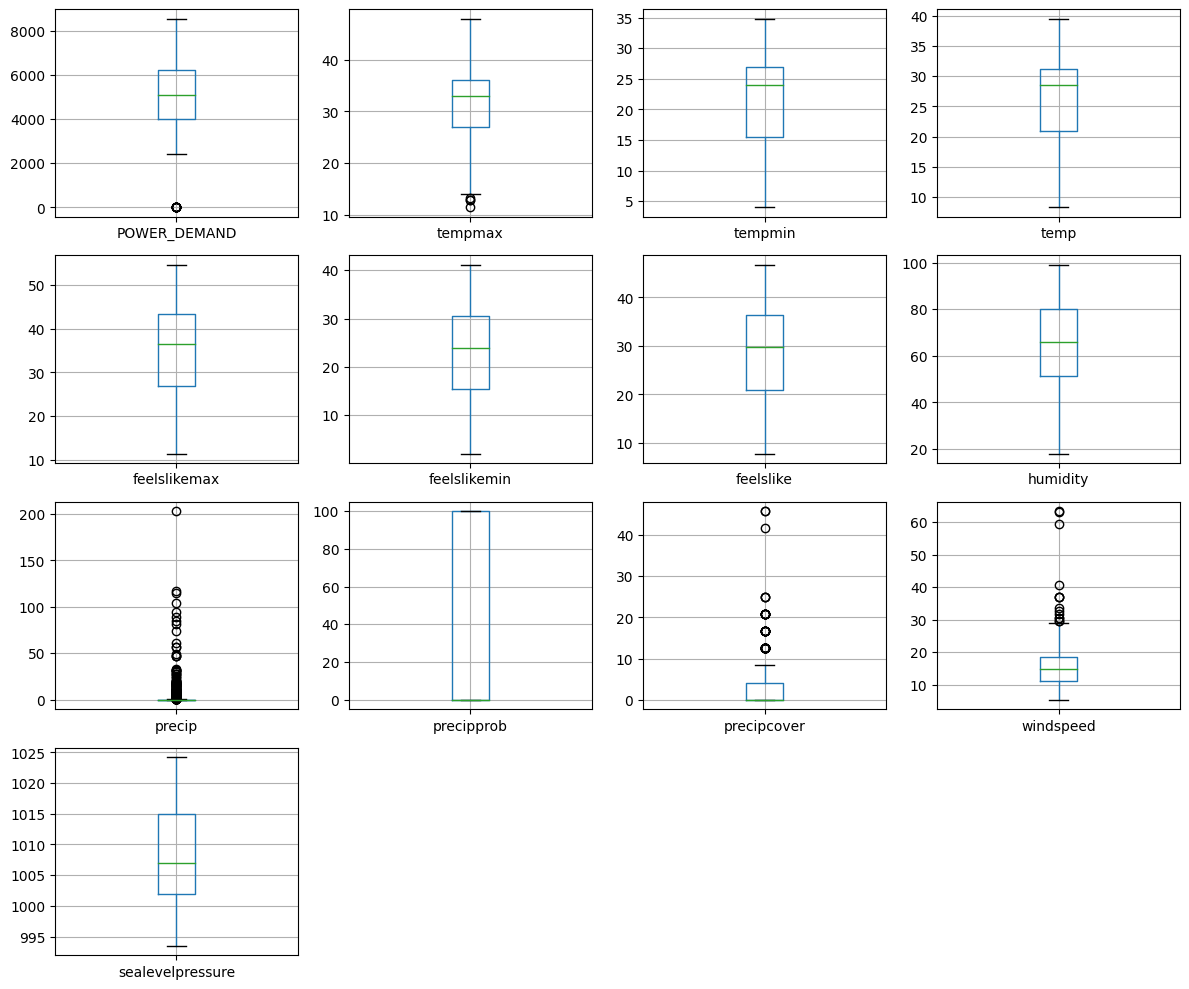

In [ ]:
# Step 1.1: Examine Data Distribution and Identify Potential Issues
import pandas as pd
import matplotlib.pyplot as plt

# Descriptive statistics for numerical features
numerical_stats = df1.describe()

# Histograms for numerical features
df1.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig('numerical_histograms.png')  # Save the combined histograms as a single image

# Box plots for numerical features
plt.figure(figsize=(12, 10))
for i, column in enumerate(df1.select_dtypes(include=['number']).columns):
    plt.subplot(4, 4, i + 1)
    df1.boxplot(column=column)
plt.tight_layout()
plt.savefig('numerical_boxplots.png')  # Save the combined box plots as a single image

# Frequency tables for categorical features
preciptype_counts = df1['preciptype'].value_counts()
conditions_counts = df1['conditions'].value_counts()




In [ ]:

# Step 1.2: Handle Missing Values in 'preciptype'
import pandas as pd

# Check rows with missing 'preciptype' and corresponding 'precip' and 'precipprob'
missing_preciptype = df1['preciptype'].isnull()
missing_preciptype_data = df1[missing_preciptype][['precip', 'precipprob']]

# Impute missing 'preciptype' with "None" if 'precip' and 'precipprob' are 0
df1['preciptype'] = df1['preciptype'].fillna(pd.NA)  # Replace NaN with pd.NA
df1.loc[(df1['precip'] == 0) & (df1['precipprob'] == 0) & df1['preciptype'].isnull(), 'preciptype'] = "None"



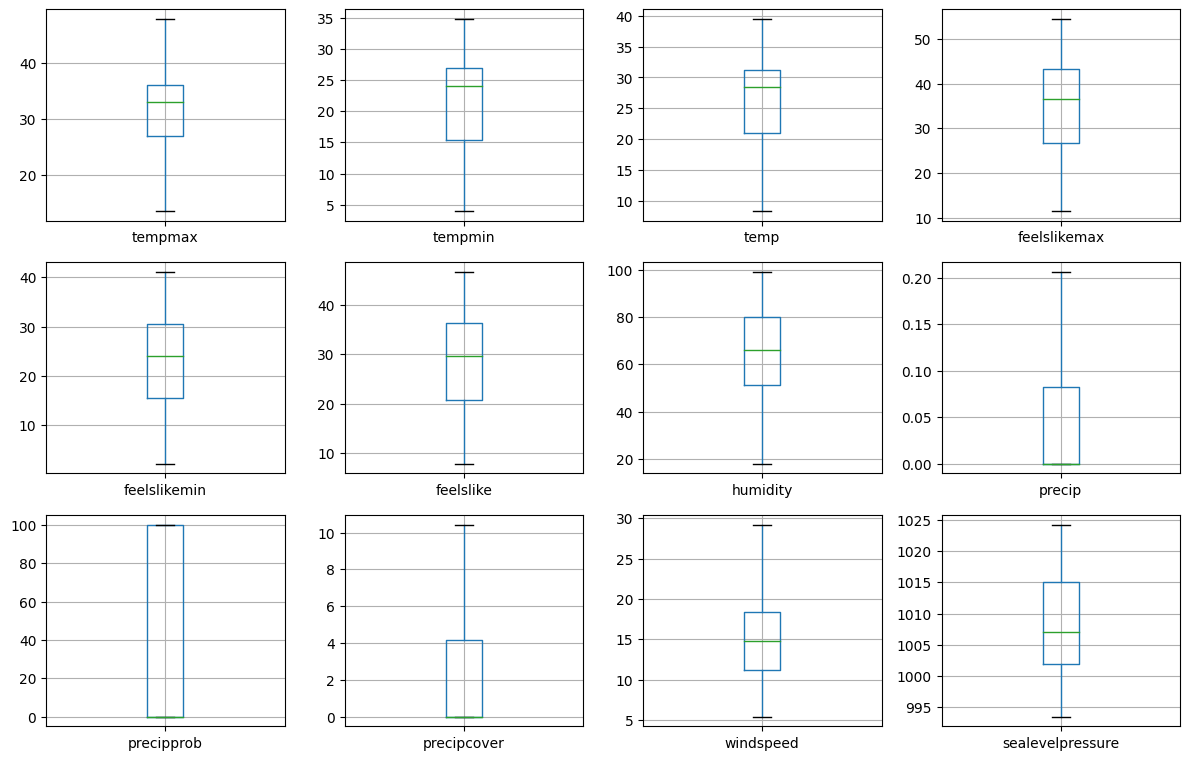

In [ ]:

# Step 1.3: Handle Outliers in Numerical Features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select numerical columns (excluding 'POWER_DEMAND' initially)
numerical_cols = df1.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('POWER_DEMAND')

# Function to detect and handle outliers using IQR method
def handle_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply outlier handling to each numerical column (except 'POWER_DEMAND')
for col in numerical_cols:
    df1 = handle_outliers_iqr(df1, col)

# Box plots after outlier handling
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    df1.boxplot(column=column)
plt.tight_layout()
plt.savefig('numerical_boxplots_after_outlier_handling.png')



In [ ]:

# Step 1.4: Convert 'DATE' to Datetime and Extract Features
import pandas as pd

# Convert 'DATE' column to datetime object
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Extract dayofweek, month, and year
df1['dayofweek'] = df1['DATE'].dt.dayofweek
df1['month'] = df1['DATE'].dt.month
df1['year'] = df1['DATE'].dt.year


In [ ]:

# Step 1.5: Add Holiday Information
import pandas as pd
import holidays

# Create a list of Indian holidays for Delhi (2022 onwards)
india_holidays = holidays.country_holidays('IN', subdiv='DL')

# Add 'is_weekly_holiday' column (Sunday = 6)
df1['is_weekly_holiday'] = (df1['dayofweek'] == 6).astype(int)

# Add 'is_public_holiday' column
df1['is_public_holiday'] = df1['DATE'].apply(lambda date: 1 if date in india_holidays else 0)


In [ ]:

# Step 1.5.1: Correct Holiday Information Addition
import pandas as pd
import holidays

# Create a list of Indian holidays for Delhi (2022 onwards)
india_holidays = holidays.country_holidays('IN', subdiv='DL', years=range(2022, 2024))  # Include 2023 as well

# Add 'is_weekly_holiday' column (Sunday = 6)
df1['is_weekly_holiday'] = (df1['dayofweek'] == 6).astype(int)

# Add 'is_public_holiday' column
df1['is_public_holiday'] = df1['DATE'].apply(lambda date: 1 if date in india_holidays else 0)


In [ ]:
# Step 2.1: Create Lagged Features for 'POWER_DEMAND'
import pandas as pd

# Create lagged features for 'POWER_DEMAND' with lags of 1, 7, and 14 days
df1['POWER_DEMAND_lag1'] = df1['POWER_DEMAND'].shift(1)
df1['POWER_DEMAND_lag7'] = df1['POWER_DEMAND'].shift(7)
df1['POWER_DEMAND_lag14'] = df1['POWER_DEMAND'].shift(14)

# Remove rows with NaN values introduced by lagging
df1.dropna(subset=['POWER_DEMAND_lag1', 'POWER_DEMAND_lag7', 'POWER_DEMAND_lag14'], inplace=True)


In [ ]:

# Step 2.2: Create Moving Average Features for 'POWER_DEMAND'
import pandas as pd

# Create moving average features with window sizes of 3 and 7 days
df1['POWER_DEMAND_ma3'] = df1['POWER_DEMAND'].rolling(window=3).mean()
df1['POWER_DEMAND_ma7'] = df1['POWER_DEMAND'].rolling(window=7).mean()

# Remove rows with NaN values introduced by the moving average calculation
df1.dropna(subset=['POWER_DEMAND_ma3', 'POWER_DEMAND_ma7'], inplace=True)


In [ ]:
# Step 2.3: Explore Interaction Terms Between Weather Features
import pandas as pd

# Create interaction terms
df1['temp_humidity_interaction'] = df1['temp'] * df1['humidity']
df1['feelslike_windspeed_interaction'] = df1['feelslike'] * df1['windspeed']
df1['tempmax_precip_interaction'] = df1['tempmax'] * df1['precip']
df1['tempmin_humidity_interaction'] = df1['tempmin'] * df1['humidity']


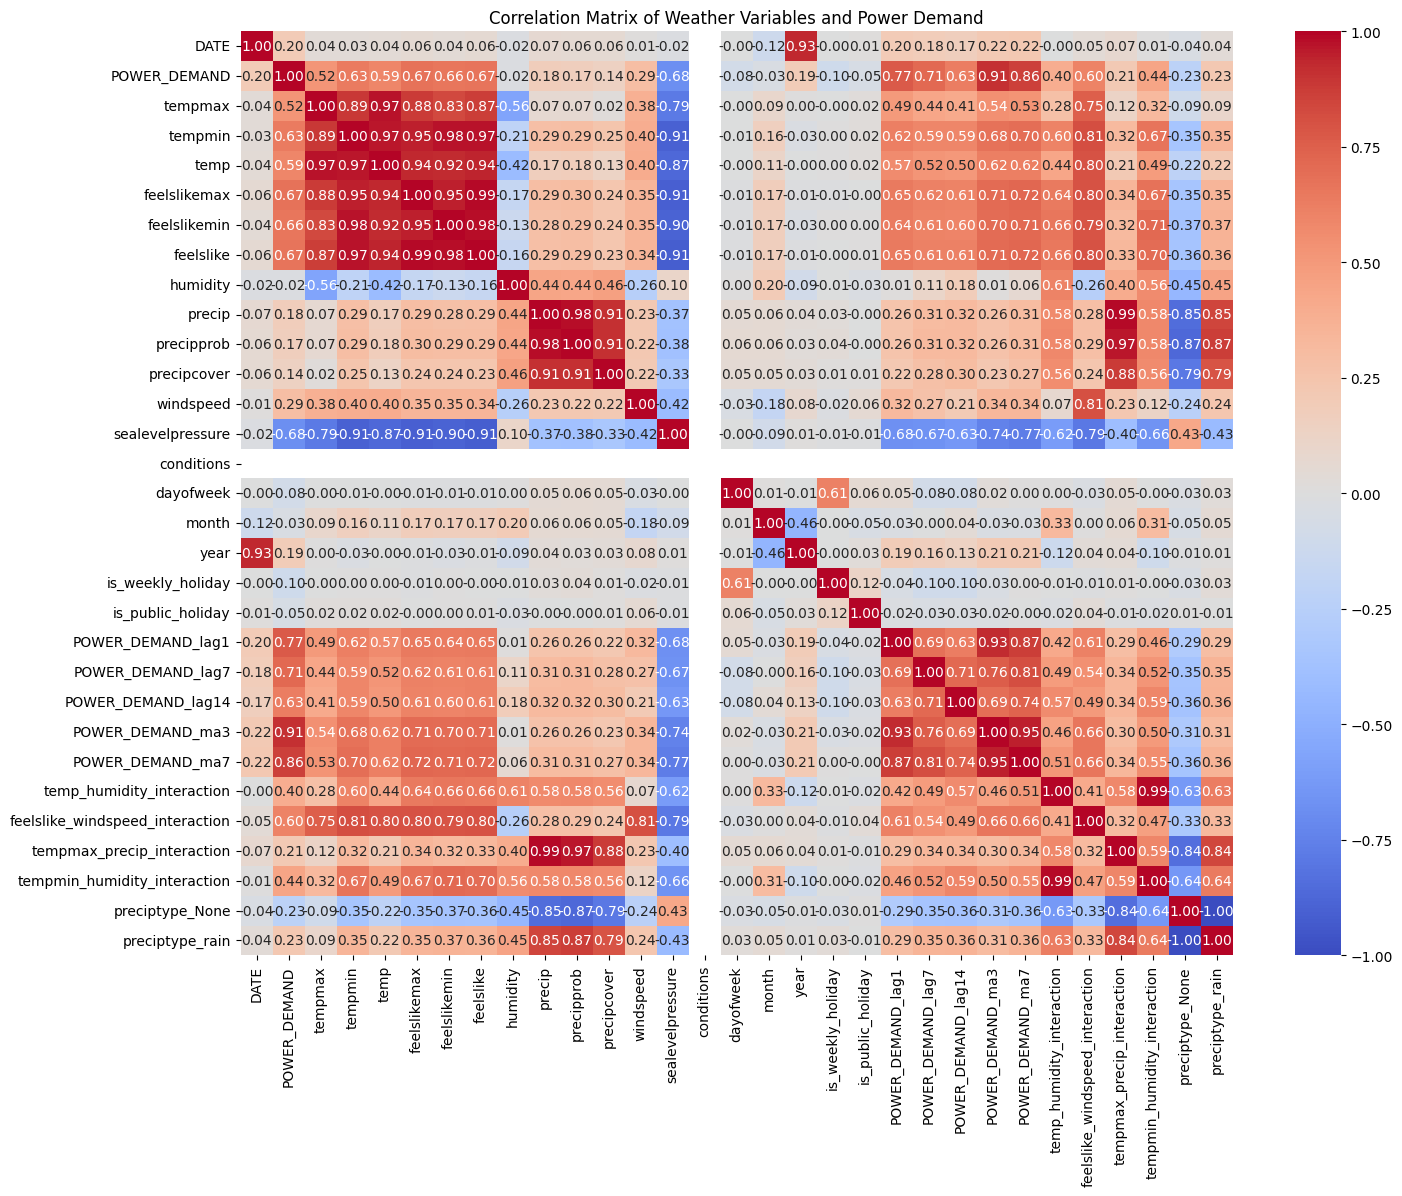

In [ ]:

# Step 3.1: Analyze Correlation Between Weather Variables and Power Demand
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'preciptype' to numerical representation using one-hot encoding
df1 = pd.get_dummies(df1, columns=['preciptype'], prefix=['preciptype'])

# Convert columns to numeric, coercing errors to NaN
for column in df1.columns:
    try:
        df1[column] = pd.to_numeric(df1[column], errors='coerce')
    except:
        pass  # Handle columns that cannot be converted

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Variables and Power Demand')
plt.savefig('correlation_heatmap.png')


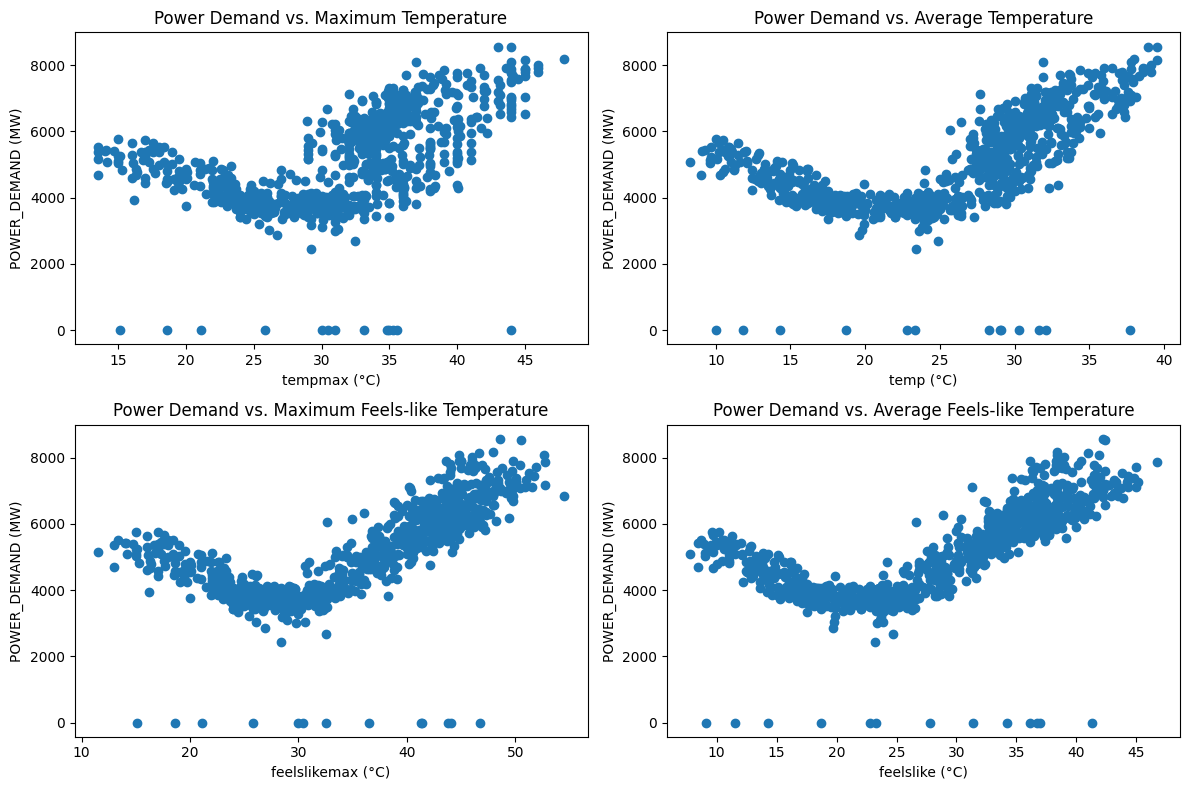

In [ ]:
# Step 3.2: Visualize Relationship Between Power Demand and Temperature
import pandas as pd
import matplotlib.pyplot as plt

# Create scatter plots for 'POWER_DEMAND' vs. temperature variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(df1['tempmax'], df1['POWER_DEMAND'])
axes[0, 0].set_xlabel('tempmax (°C)')
axes[0, 0].set_ylabel('POWER_DEMAND (MW)')
axes[0, 0].set_title('Power Demand vs. Maximum Temperature')

axes[0, 1].scatter(df1['temp'], df1['POWER_DEMAND'])
axes[0, 1].set_xlabel('temp (°C)')
axes[0, 1].set_ylabel('POWER_DEMAND (MW)')
axes[0, 1].set_title('Power Demand vs. Average Temperature')

axes[1, 0].scatter(df1['feelslikemax'], df1['POWER_DEMAND'])
axes[1, 0].set_xlabel('feelslikemax (°C)')
axes[1, 0].set_ylabel('POWER_DEMAND (MW)')
axes[1, 0].set_title('Power Demand vs. Maximum Feels-like Temperature')

axes[1, 1].scatter(df1['feelslike'], df1['POWER_DEMAND'])
axes[1, 1].set_xlabel('feelslike (°C)')
axes[1, 1].set_ylabel('POWER_DEMAND (MW)')
axes[1, 1].set_title('Power Demand vs. Average Feels-like Temperature')


plt.tight_layout()
plt.savefig('power_demand_vs_temperature.png')


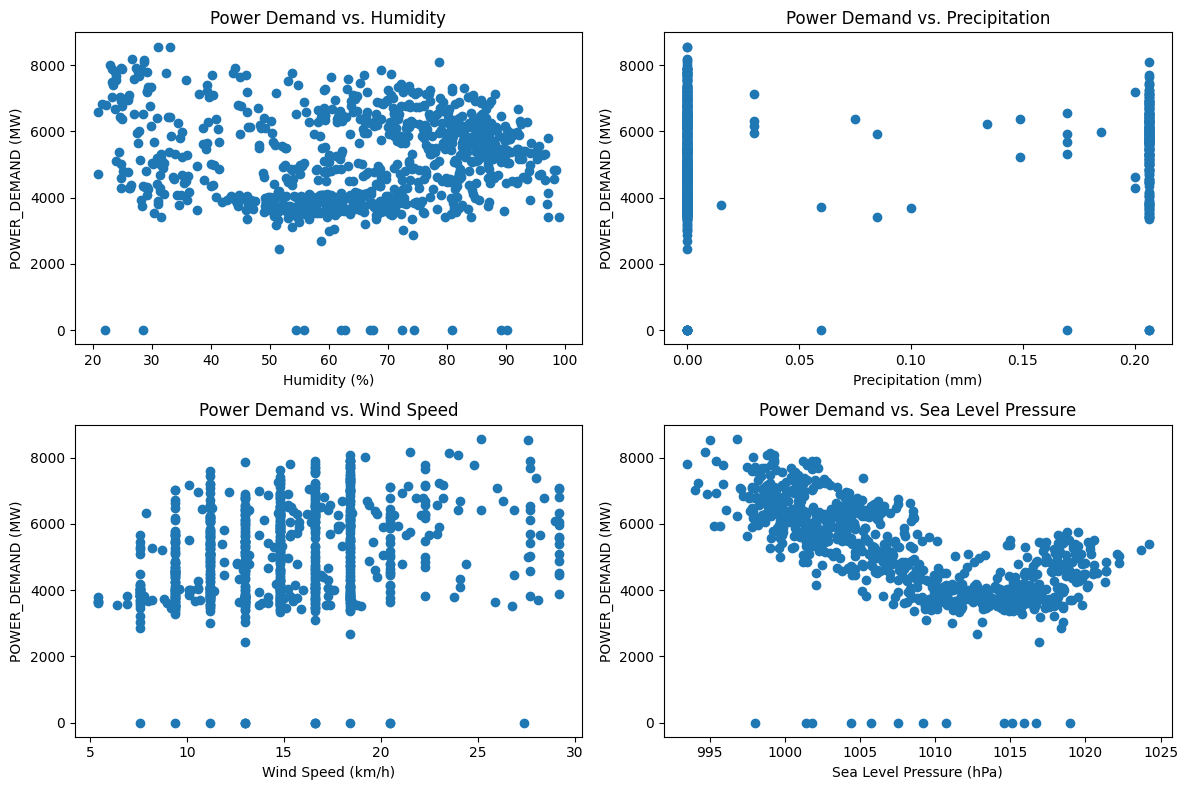

In [ ]:
# Step 3.3: Visualize Relationship Between Power Demand and Other Weather Variables
import pandas as pd
import matplotlib.pyplot as plt

# Create scatter plots for 'POWER_DEMAND' vs. other weather variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(df1['humidity'], df1['POWER_DEMAND'])
axes[0, 0].set_xlabel('Humidity (%)')
axes[0, 0].set_ylabel('POWER_DEMAND (MW)')
axes[0, 0].set_title('Power Demand vs. Humidity')

axes[0, 1].scatter(df1['precip'], df1['POWER_DEMAND'])
axes[0, 1].set_xlabel('Precipitation (mm)')
axes[0, 1].set_ylabel('POWER_DEMAND (MW)')
axes[0, 1].set_title('Power Demand vs. Precipitation')

axes[1, 0].scatter(df1['windspeed'], df1['POWER_DEMAND'])
axes[1, 0].set_xlabel('Wind Speed (km/h)')
axes[1, 0].set_ylabel('POWER_DEMAND (MW)')
axes[1, 0].set_title('Power Demand vs. Wind Speed')

axes[1, 1].scatter(df1['sealevelpressure'], df1['POWER_DEMAND'])
axes[1, 1].set_xlabel('Sea Level Pressure (hPa)')
axes[1, 1].set_ylabel('POWER_DEMAND (MW)')
axes[1, 1].set_title('Power Demand vs. Sea Level Pressure')

plt.tight_layout()
plt.savefig('power_demand_vs_other_weather_variables.png')



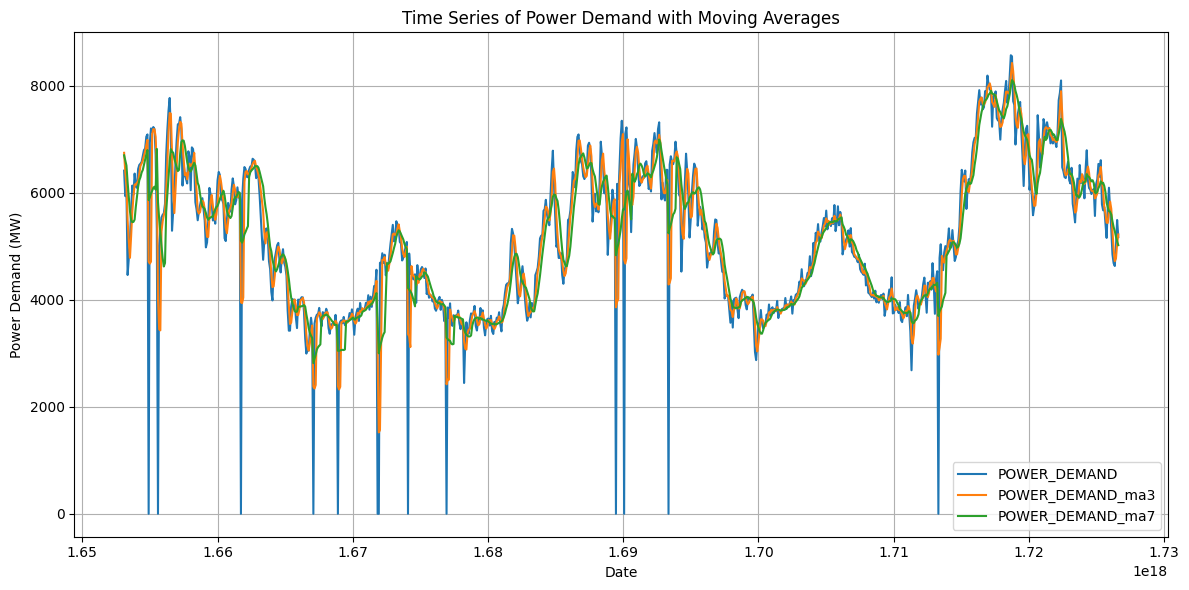

In [ ]:
# Step 3.4: Visualize Time Series of Power Demand with Moving Averages
import pandas as pd
import matplotlib.pyplot as plt

# Plot the time series of 'POWER_DEMAND' along with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df1['DATE'], df1['POWER_DEMAND'], label='POWER_DEMAND')
plt.plot(df1['DATE'], df1['POWER_DEMAND_ma3'], label='POWER_DEMAND_ma3')
plt.plot(df1['DATE'], df1['POWER_DEMAND_ma7'], label='POWER_DEMAND_ma7')
plt.xlabel('Date')
plt.ylabel('Power Demand (MW)')
plt.title('Time Series of Power Demand with Moving Averages')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('power_demand_time_series.png')



Average Power Demand on Weekdays: 5170.45 MW
Average Power Demand on Weekends: 4754.52 MW
Average Power Demand on Holidays: 4785.95 MW
Average Power Demand on Non-Holidays: 5127.63 MW


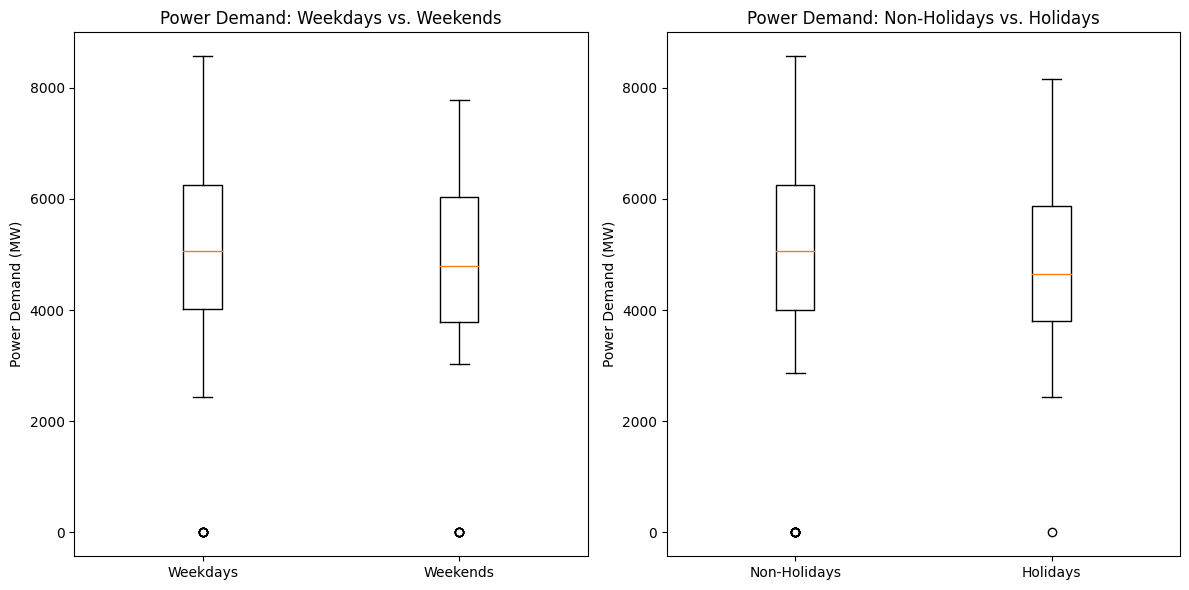

In [ ]:

# Step 3.5: Analyze the Impact of Holidays and Weekends on Power Demand
import pandas as pd
import matplotlib.pyplot as plt

# Calculate average power demand for weekdays and weekends
weekday_avg_power_demand = df1[df1['is_weekly_holiday'] == 0]['POWER_DEMAND'].mean()
weekend_avg_power_demand = df1[df1['is_weekly_holiday'] == 1]['POWER_DEMAND'].mean()

# Calculate average power demand for holidays and non-holidays
holiday_avg_power_demand = df1[df1['is_public_holiday'] == 1]['POWER_DEMAND'].mean()
non_holiday_avg_power_demand = df1[df1['is_public_holiday'] == 0]['POWER_DEMAND'].mean()

# Create box plots to compare power demand distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for weekdays vs. weekends
axes[0].boxplot([df1[df1['is_weekly_holiday'] == 0]['POWER_DEMAND'],
                 df1[df1['is_weekly_holiday'] == 1]['POWER_DEMAND']],
                labels=['Weekdays', 'Weekends'])
axes[0].set_ylabel('Power Demand (MW)')
axes[0].set_title('Power Demand: Weekdays vs. Weekends')

# Box plot for holidays vs. non-holidays
axes[1].boxplot([df1[df1['is_public_holiday'] == 0]['POWER_DEMAND'],
                 df1[df1['is_public_holiday'] == 1]['POWER_DEMAND']],
                labels=['Non-Holidays', 'Holidays'])
axes[1].set_ylabel('Power Demand (MW)')
axes[1].set_title('Power Demand: Non-Holidays vs. Holidays')

plt.tight_layout()
plt.savefig('power_demand_holidays_weekends.png')

# Print average power demand values for analysis by LLM3
print(f"Average Power Demand on Weekdays: {weekday_avg_power_demand:.2f} MW")
print(f"Average Power Demand on Weekends: {weekend_avg_power_demand:.2f} MW")
print(f"Average Power Demand on Holidays: {holiday_avg_power_demand:.2f} MW")
print(f"Average Power Demand on Non-Holidays: {non_holiday_avg_power_demand:.2f} MW")



In [ ]:

# Step 3.6: Verify Accuracy of Holiday Information
import pandas as pd
import random

# Sample 10 random dates from the dataframe
sample_dates = random.sample(range(len(df1)), 10)
sample_data = df1.iloc[sample_dates][['DATE', 'is_weekly_holiday', 'is_public_holiday']]

# Display the sample data
print(sample_data)




                    DATE  is_weekly_holiday  is_public_holiday
670  1709424000000000000                  1                  0
233  1671667200000000000                  0                  0
171  1666310400000000000                  0                  0
813  1721779200000000000                  0                  0
751  1716422400000000000                  0                  0
710  1712880000000000000                  0                  0
693  1711411200000000000                  0                  0
249  1673049600000000000                  0                  0
489  1693785600000000000                  0                  0
504  1695081600000000000                  0                  0


Correlation with POWER_DEMAND_lag1: 0.7714
Correlation with POWER_DEMAND_lag7: 0.7112
Correlation with POWER_DEMAND_lag14: 0.6324


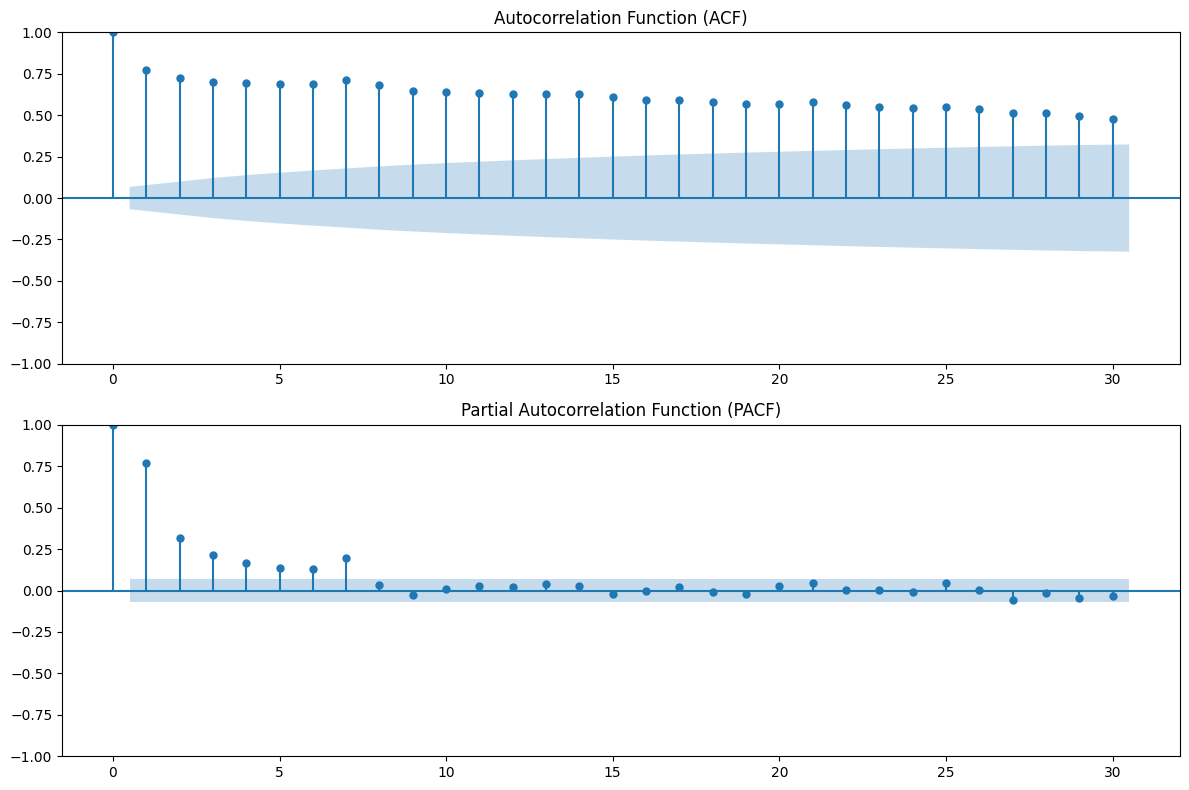

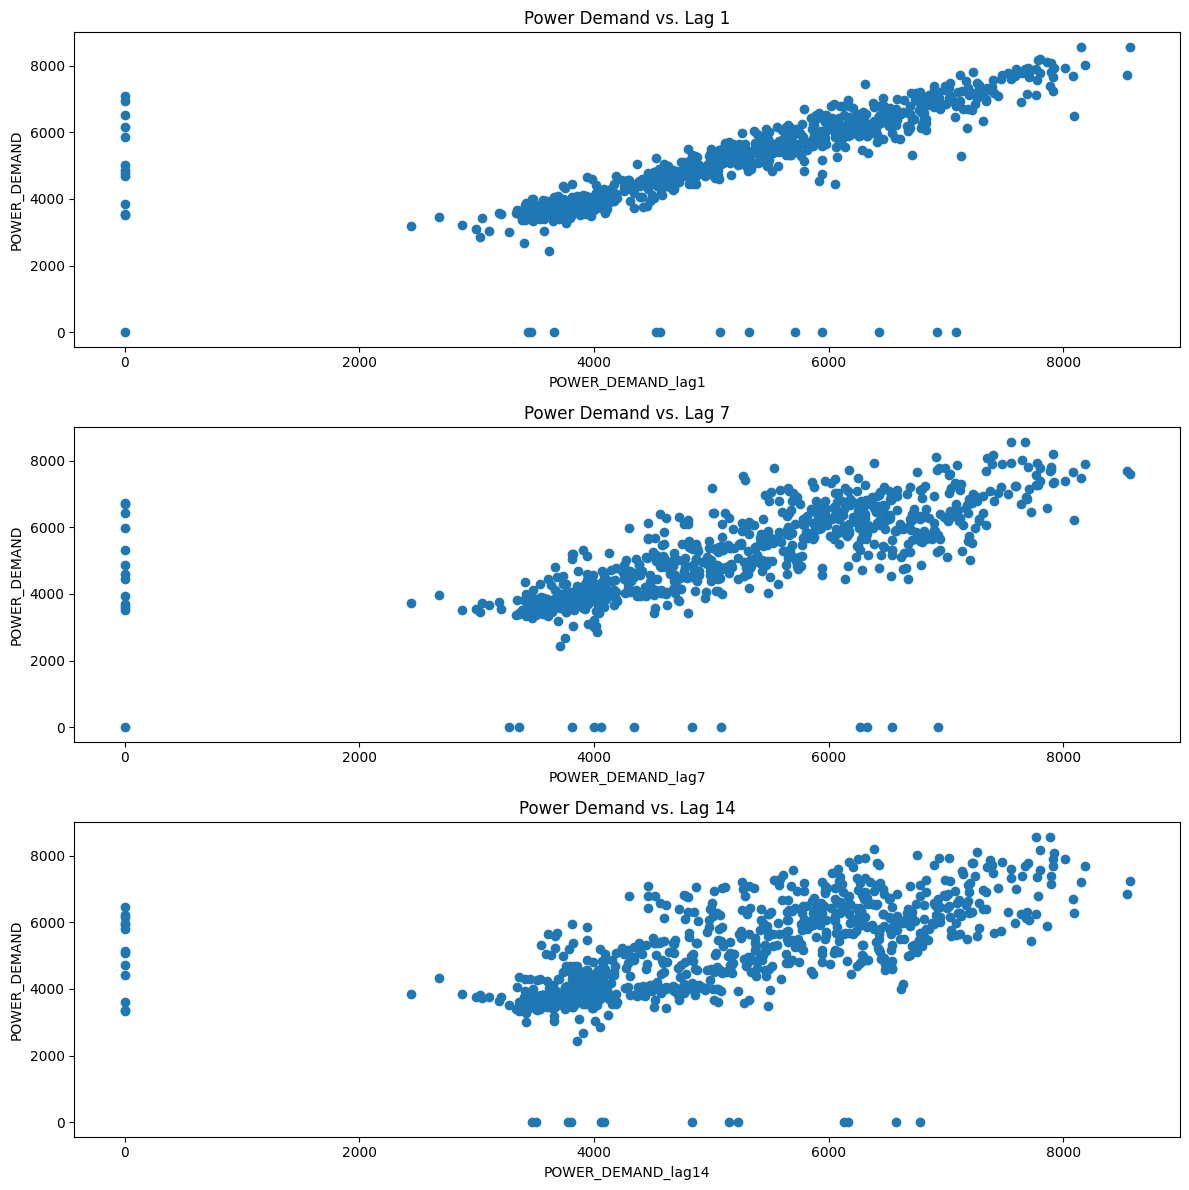

In [ ]:
# Step 3.7: Analyze Lagged Features
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plots (ACF and PACF)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df1['POWER_DEMAND'], lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df1['POWER_DEMAND'], lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.savefig('autocorrelation_plots.png')


# Scatter plots of 'POWER_DEMAND' vs. lagged features
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].scatter(df1['POWER_DEMAND_lag1'], df1['POWER_DEMAND'])
axes[0].set_xlabel('POWER_DEMAND_lag1')
axes[0].set_ylabel('POWER_DEMAND')
axes[0].set_title('Power Demand vs. Lag 1')

axes[1].scatter(df1['POWER_DEMAND_lag7'], df1['POWER_DEMAND'])
axes[1].set_xlabel('POWER_DEMAND_lag7')
axes[1].set_ylabel('POWER_DEMAND')
axes[1].set_title('Power Demand vs. Lag 7')

axes[2].scatter(df1['POWER_DEMAND_lag14'], df1['POWER_DEMAND'])
axes[2].set_xlabel('POWER_DEMAND_lag14')
axes[2].set_ylabel('POWER_DEMAND')
axes[2].set_title('Power Demand vs. Lag 14')

plt.tight_layout()
plt.savefig('scatter_plots_lagged.png')


# Correlation coefficients
correlation_lag1 = df1['POWER_DEMAND'].corr(df1['POWER_DEMAND_lag1'])
correlation_lag7 = df1['POWER_DEMAND'].corr(df1['POWER_DEMAND_lag7'])
correlation_lag14 = df1['POWER_DEMAND'].corr(df1['POWER_DEMAND_lag14'])

print(f"Correlation with POWER_DEMAND_lag1: {correlation_lag1:.4f}")
print(f"Correlation with POWER_DEMAND_lag7: {correlation_lag7:.4f}")
print(f"Correlation with POWER_DEMAND_lag14: {correlation_lag14:.4f}")


Correlation with POWER_DEMAND_ma3: 0.9090
Correlation with POWER_DEMAND_ma7: 0.8600
Correlation between POWER_DEMAND_ma3 and POWER_DEMAND_lag1: 0.9265
Correlation between POWER_DEMAND_ma3 and POWER_DEMAND_lag7: 0.7589
Correlation between POWER_DEMAND_ma3 and POWER_DEMAND_lag14: 0.6900
Correlation between POWER_DEMAND_ma7 and POWER_DEMAND_lag1: 0.8746
Correlation between POWER_DEMAND_ma7 and POWER_DEMAND_lag7: 0.8146
Correlation between POWER_DEMAND_ma7 and POWER_DEMAND_lag14: 0.7363


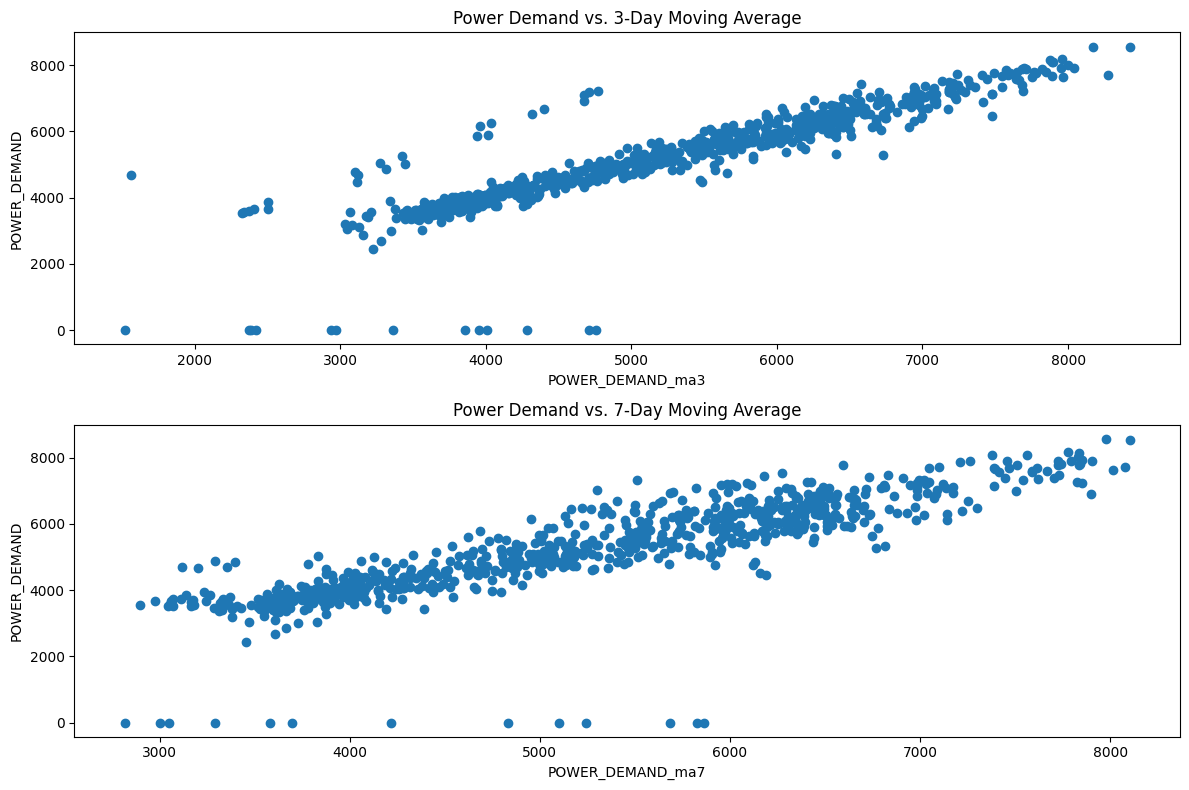

In [ ]:

# Step 3.8: Analyze Moving Average Features
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plots of 'POWER_DEMAND' vs. moving average features
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].scatter(df1['POWER_DEMAND_ma3'], df1['POWER_DEMAND'])
axes[0].set_xlabel('POWER_DEMAND_ma3')
axes[0].set_ylabel('POWER_DEMAND')
axes[0].set_title('Power Demand vs. 3-Day Moving Average')

axes[1].scatter(df1['POWER_DEMAND_ma7'], df1['POWER_DEMAND'])
axes[1].set_xlabel('POWER_DEMAND_ma7')
axes[1].set_ylabel('POWER_DEMAND')
axes[1].set_title('Power Demand vs. 7-Day Moving Average')

plt.tight_layout()
plt.savefig('scatter_plots_moving_average.png')

# Correlation coefficients between 'POWER_DEMAND' and moving average features
correlation_ma3 = df1['POWER_DEMAND'].corr(df1['POWER_DEMAND_ma3'])
correlation_ma7 = df1['POWER_DEMAND'].corr(df1['POWER_DEMAND_ma7'])

print(f"Correlation with POWER_DEMAND_ma3: {correlation_ma3:.4f}")
print(f"Correlation with POWER_DEMAND_ma7: {correlation_ma7:.4f}")

# Correlation coefficients between moving average features and lagged features
correlation_ma3_lag1 = df1['POWER_DEMAND_ma3'].corr(df1['POWER_DEMAND_lag1'])
correlation_ma3_lag7 = df1['POWER_DEMAND_ma3'].corr(df1['POWER_DEMAND_lag7'])
correlation_ma3_lag14 = df1['POWER_DEMAND_ma3'].corr(df1['POWER_DEMAND_lag14'])

correlation_ma7_lag1 = df1['POWER_DEMAND_ma7'].corr(df1['POWER_DEMAND_lag1'])
correlation_ma7_lag7 = df1['POWER_DEMAND_ma7'].corr(df1['POWER_DEMAND_lag7'])
correlation_ma7_lag14 = df1['POWER_DEMAND_ma7'].corr(df1['POWER_DEMAND_lag14'])


print(f"Correlation between POWER_DEMAND_ma3 and POWER_DEMAND_lag1: {correlation_ma3_lag1:.4f}")
print(f"Correlation between POWER_DEMAND_ma3 and POWER_DEMAND_lag7: {correlation_ma3_lag7:.4f}")
print(f"Correlation between POWER_DEMAND_ma3 and POWER_DEMAND_lag14: {correlation_ma3_lag14:.4f}")

print(f"Correlation between POWER_DEMAND_ma7 and POWER_DEMAND_lag1: {correlation_ma7_lag1:.4f}")
print(f"Correlation between POWER_DEMAND_ma7 and POWER_DEMAND_lag7: {correlation_ma7_lag7:.4f}")
print(f"Correlation between POWER_DEMAND_ma7 and POWER_DEMAND_lag14: {correlation_ma7_lag14:.4f}")


In [ ]:
# Step 3.9: Analyze Correlation Between Interaction Terms and Power Demand
import pandas as pd
import matplotlib.pyplot as plt

# Correlation coefficients between 'POWER_DEMAND' and interaction terms
correlation_temp_humidity = df1['POWER_DEMAND'].corr(df1['temp_humidity_interaction'])
correlation_feelslike_windspeed = df1['POWER_DEMAND'].corr(df1['feelslike_windspeed_interaction'])
correlation_tempmax_precip = df1['POWER_DEMAND'].corr(df1['tempmax_precip_interaction'])
correlation_tempmin_humidity = df1['POWER_DEMAND'].corr(df1['tempmin_humidity_interaction'])


print(f"Correlation with temp_humidity_interaction: {correlation_temp_humidity:.4f}")
print(f"Correlation with feelslike_windspeed_interaction: {correlation_feelslike_windspeed:.4f}")
print(f"Correlation with tempmax_precip_interaction: {correlation_tempmax_precip:.4f}")
print(f"Correlation with tempmin_humidity_interaction: {correlation_tempmin_humidity:.4f}")



Correlation with temp_humidity_interaction: 0.3979
Correlation with feelslike_windspeed_interaction: 0.6023
Correlation with tempmax_precip_interaction: 0.2149
Correlation with tempmin_humidity_interaction: 0.4384
